In [25]:
#%load_ext autoreload
#%autoreload 2

from kraken import binarization
import matplotlib.pyplot as plt

from PIL import Image
from kalchas.ocr import lists_models, load_ocr_model
from kalchas.utils import segment 
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
lists_models()

['model1']

In [3]:
model = load_ocr_model('model1')

In [60]:
image_path = "images/0086.jpg"
image  = Image.open(image_path).convert('L')
if len(image.getcolors())>2:
    bw = False 
if not bw:
    image = binarization.nlbin(image)

bboxes = segment(image)

In [72]:
image.getcolors()

[(398258, 0), (4306413, 255)]

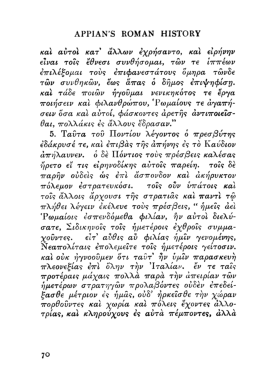

In [73]:
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

In [74]:
 
# bounding boxes
boxes = bboxes['boxes']

In [75]:
  # for all segments, ocr and save 
np_img = np.array(image)
images = [] 
for index in range(len(boxes)):

    x1, y1, x2, y2 = boxes[index]
    cropped_im = np_img[y1:y2, x1:x2,]
    images.append( Image.fromarray(cropped_im.copy()))

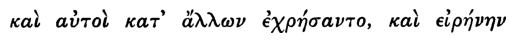

καὶ αὐτοὶ κατ’ ἄλλων ἐχρήσαντο, καὶ εἰρύθηε
------------------------


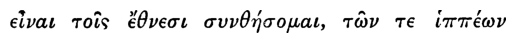

εἶναι τοῦς ἔθνεσι συεθήσομαι, τῶν τε ἑππέωῃ
------------------------


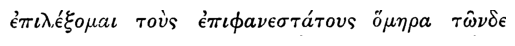

ἀπελέξομαι τοὺν ἀπεφαεεστέτουν ὅμηχρα τῶηδε
------------------------


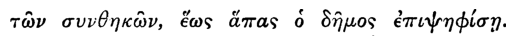

τῶεν συυθηηκῶη, ἕων ὅπαν ὁ δθμεον ἐποψηφίσῃ.
------------------------


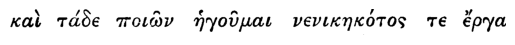

καὶ τάδε ποεῶν ἡγοθμαι νευεκηότον τε ἔργα
------------------------


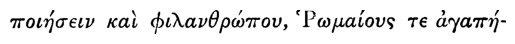

ποιήσει: καὶ ὠῥιλαθρώπου, Ῥωμαίουν τε ἀγαπή-
------------------------


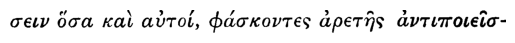

σειε ὅσα καὶ αὐτοί, ῥάσκουτεν ἀρετῆς ἀτιποιεῖσ-
------------------------


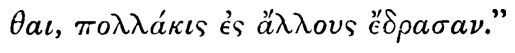

βαε, πολλάεν ὧ ἄλλουε ἔδρασα'
------------------------


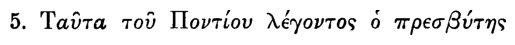

5. Ταθτα τοῦ Πουτέου λόγοχτος ὁ πρεσβύτης
------------------------


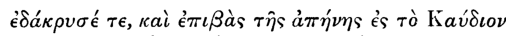

ἐδάκρυσέ τε, αὶ ἐπεβὰν τῆν ἀπήνην ἀν τὸ Καύδεον
------------------------


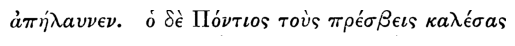

ἀπήλαυνεω, ὁ δδὲ Πόντεον τοὸν πρέσθειν καλέσαν
------------------------


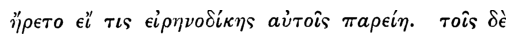

ἤρετο εἴ τεν εἰρηεοδίκην αὐτοΐν παρείη. τοῦ δὲ
------------------------


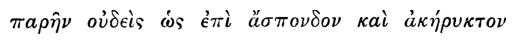

παρν οὐδεὶν ὡν ἀπὶ ἄσπουδον καὶ ἀκήρυκτου
------------------------


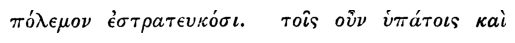

πόλεμον ἀστρατευκόσι. τοῦς οὖ ὑπάτοιν αὶ
------------------------


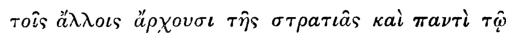

τοΐς ἄλλοιν ἄρχουσι τῆε σπρατεν καὶ παντὶ τῷ
------------------------


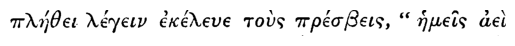

πλήθει λέγειυ ἀκέλευε τοὺν πρέσθειν, 7 ὁμιεῦν ἀεὶ
------------------------


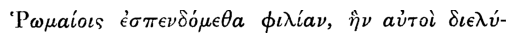

Ῥωμαίοιν ἀσπενδόμεθα ὠῥιλίαυ, δε αὐτοὶ διελύ-
------------------------


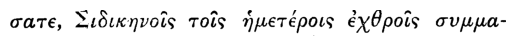

σασε, Σεδικηγεοΐν τοῖν ἡμιετέροιν ἀχθρον συμεμα-
------------------------


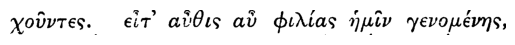

χοθετεν. εἶτ’ αὖθεν αὗ ιλίαν ἡμεν γενομέυηε,
------------------------


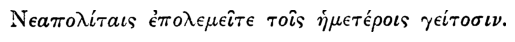

Νεαπολίταις ἀπολεμεῖτε τος ἡμετέροιν γείτοσεε,
------------------------


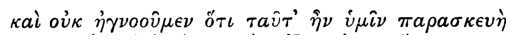

καὶ οὐκ ἠγεροθμεν ὅτι παθπ’ ἦν ὑμιΐν παρασευὴ
------------------------


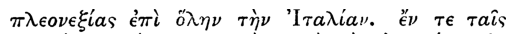

πλεουεξίαν ἐπὸ ὅληε τὴν Πταλίφε, ἐν τε ταβ-
------------------------


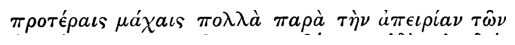

προτέραιν μιάχαιν πολλὰ παρὰ τὴν ἀπφεερίαν τῶν
------------------------


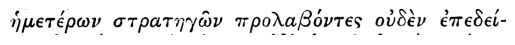

ἡμετέρων στρατηγῶν προλαθόντεν οὐύδὲν ἐπεδεί-
------------------------


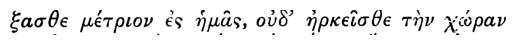

ξασθε μέτριον ἐν ἡμῶν, οὐδ’ ἠρκεῖσθε τὴν χιώραν
------------------------


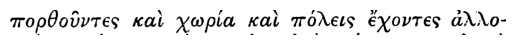

πορθοθντεν καὶ χωρία αὶ πόλειν ἔχουτεν ἀλλο-
------------------------


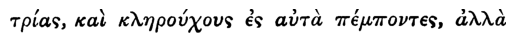

τπρίαν, αὶ πληρούχουν ἀν αὐτὰ πέμιπουτεν, ἀλλὰ
------------------------


In [76]:
text= model.ocr(images)

for img, text in zip(images[1:], text[1:]):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()
    print(text)
    print('------------------------')
    